<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
# Import the necessary libraries.
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
# Import the boston housing dataset.
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(404, 13) (404,) (102, 13) (102,)


In [3]:
# Normalize the data (all features should have roughly the same scale)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Instantiate a model object and use model.add() to add layers to your model
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 13ms/step - loss: 578.9926 - mae: 22.1627 - val_loss: 602.8475 - val_mae: 22.7456
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 565.7316 - mae: 21.8821 - val_loss: 588.9561 - val_mae: 22.4496
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 551.5385 - mae: 21.5664 - val_loss: 573.2430 - val_mae: 22.1084
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 534.2165 - mae: 21.1821 - val_loss: 554.8188 - val_mae: 21.6975
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 514.1033 - mae: 20.7179 - val_loss: 531.9840 - val_mae: 21.1734
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 488.0867 - mae: 20.1109 - val_loss: 504.3102 - val_mae: 20.5189
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 457.5910 - mae: 19.3680 - val_loss: 469.1779 - val_mae: 19.6678
Epoch 8/100
13/13 [=====================

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


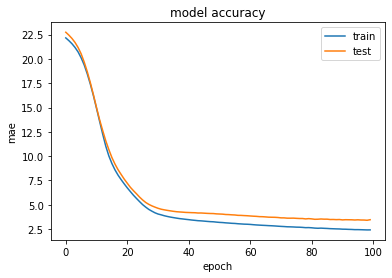

In [5]:
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model accuracy')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

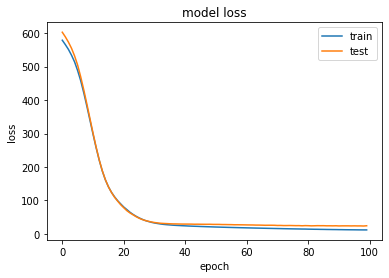

In [6]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [7]:
# Run this same data through a linear regression model. Which achieves higher accuracy?
lin_reg = LinearRegression().fit(X_train_scaled, y_train)
y_pred = lin_reg.predict(X_test_scaled)
result = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error of the linear regression model is {result}')

Mean Absolute Error of the linear regression model is 3.464185812406719


Linear Regression achieves lower MAE than our ANN.

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [8]:
##### Your Code Here #####
from tensorflow.keras.datasets import fashion_mnist

# Load the mnist data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [9]:
# Normalize inputs to be between 0 and 1
# Reason we use 255 is because that value for each pixel can range between 0 to 255.
X_train = X_train / 255
X_test = X_test / 255

In [10]:
# Create the sequential model.
model = Sequential()

# Reformat the input to be a long array of 784 input values, basically append each 28 pixel row in order from top to bottom of the picture.
model.add(Flatten(input_shape=(28, 28)))

# Add a hidden layer with 16 nodes and use softmax as the activation function.
model.add(Dense(16, activation='relu'))

# Softmax is being used since its able to handle multiple classes. It normalizes the output for each class between 0 and 1 and then it divides
# by their sum - which provides the probability of the input value being in a specific output class.
model.add(Dense(10, activation='softmax'))

# Compile the model, use adam as optimizer (another option could be stohastic gradient descent) and define the metric.
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

# Verbal summary of the ANN's architecture.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Fit the actual model and run for 10 epochs.
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6282 - accuracy: 0.7857 - val_loss: 0.4927 - val_accuracy: 0.8277
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4435 - accuracy: 0.8445 - val_loss: 0.4526 - val_accuracy: 0.8422
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4097 - accuracy: 0.8575 - val_loss: 0.4310 - val_accuracy: 0.8465
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3885 - accuracy: 0.8635 - val_loss: 0.4220 - val_accuracy: 0.8490
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3749 - accuracy: 0.8681 - val_loss: 0.4139 - val_accuracy: 0.8553
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3634 - accuracy: 0.8722 - val_loss: 0.4196 - val_accuracy: 0.8557
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3566 - accuracy: 0.8733 - val_loss: 0.4051 - val_accuracy:

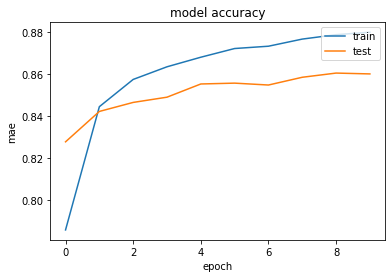

In [12]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

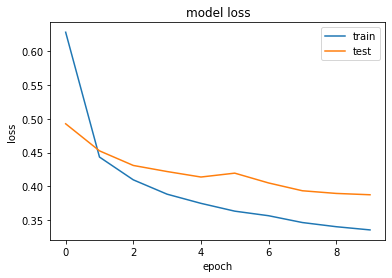

In [13]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.